<center><h1>Course background information</h1></center>

<center>William Mann</center>

<center>
<img src="https://wgjm1986.github.io/Investments/Emory_small.png" height="200px" width="300px" />
</center>

<center><h2>Overview of traditional asset classes</h2></center>

### Main categories of “traditional” investments

The main categories of traditional investments are:
- Treasury securities (Treasuries).
    - Obligations of the United States government.
- Corporate bonds.
    - Senior obligations of public corporations.
- Corporate equities (the stock market).
    - Junior obligations of public corporations.

Other investment categories are “alternatives.”  
- Real estate, private equity, derivatives, commodities, Bitcoin, ...

Note: This is a common classification, but it is not a universal standard.
For example, some people regard real estate as a “traditional” investment.

### Treasuries

Important as the “safe” component of most portfolios, because there is very little risk of outright default.
- Though, to be clear, they are only safe in nominal terms.
- Like any investment, their real return depends on inflation.

Different names correspond with different maturities:
- Treasury bill: One year maturity or less; no coupon.
- Treasury note: Two to ten years maturity.
- Treasury bond: More than ten years maturity.

Notes and bonds pay semiannual coupons.

Primary market: Auctions that happen almost every day.  
Secondary market: Mainly over-the-counter.

### Treasury yields

Like most bonds, Treasuries are not quoted in terms of price, but rather in terms of their yield to maturity.
- This is the annualized rate of return you will get if you buy the bond at the current price and hold it to maturity.
- If you know the price, you can calculate the yield to maturity, and vice versa, using DCF formulas (see below).

- These yields are risk-free (nominal) rates of return, and can be used as a benchmark for all other investments.

- These risk-free rates change every day! They are much lower today than they were in the past.

### History of Treasury yields and the term spread

Corresponds to textbook Figure 15.6. [Click here to see the most recent version.](https://fred.stlouisfed.org/graph/?g=1823t)

In [1]:
%%capture
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [14.0, 7.0]
import fredapi
Fred_API_key_string = open('/home/william/Fred_API_key.txt').read().rstrip()

DGS10 = fredapi.Fred(api_key=Fred_API_key_string).get_series('DGS10',observation_start='1970-01-01',frequency='m',aggregation_method='eop')
TB3MS = fredapi.Fred(api_key=Fred_API_key_string).get_series('TB3MS',observation_start='1970-01-01',frequency='m',aggregation_method='eop')

yields_figure,ax = plt.subplots()
DGS10.plot(ax=ax,label="10-year Treasury note yield",color='tab:blue')
TB3MS.plot(ax=ax,label="90-day Treasury bill yield",color='tab:red')
(DGS10-TB3MS).plot(ax=ax,label="Spread",color='pink',linestyle='--')
ax.legend(loc='upper right')
ax.axline([0,0],[1,0],color='black',linewidth=0.5)

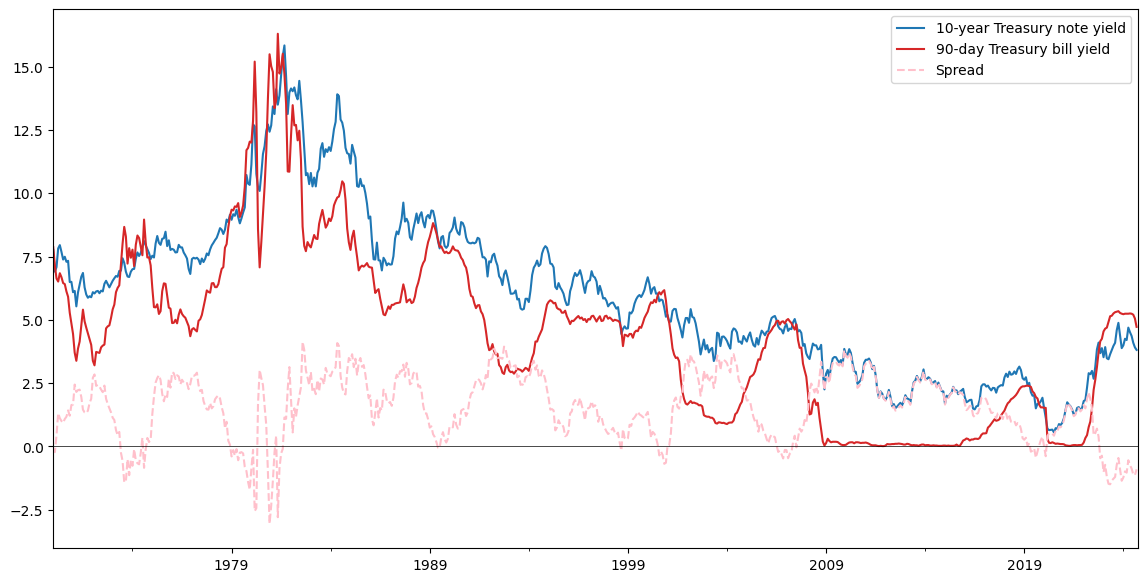

In [2]:
yields_figure

### The yield curve

Even at one point in time, there are multiple risk-free rates, as each maturity of Treasuries sells for a different price.

Previous figure: The 3m rate has followed the same downward trend as the 10-year rate, but is much more volatile.

Next figure: Snapshot of rates set at auction during Aug 2021.

The *yield curve* is a plot of yields against maturities.

The typical pattern is that longer maturities have higher yields.
When this pattern reverses, we say the yield curve is "inverted."

### Treasury yields as of Aug 13, 2021 from [treasury.gov](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield)

In [3]:
import requests
import pandas as pd
import xmltodict
from datetime import datetime

# URL for the Treasury API. The only way to filter dates is to specify a "page" number. 
# Page 26 corresponds to roughly 2021-2022.
url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/pages/xml?data=daily_treasury_yield_curve&field_tdr_date_value=all&page=26'
response = requests.get(url)

if response.status_code == 200:
    data = xmltodict.parse(response.content)
    entries = data['feed']['entry']
    records = []
    for entry in entries:
        properties = entry['content']['m:properties']
        record = {
            'Date': properties['d:NEW_DATE']['#text'],
            '1Month': float(properties['d:BC_1MONTH']['#text']),
            '2Month': float(properties['d:BC_2MONTH']['#text']),
            '3Month': float(properties['d:BC_3MONTH']['#text']),
            '6Month': float(properties['d:BC_6MONTH']['#text']),
            '1Year': float(properties['d:BC_1YEAR']['#text']),
            '2Year': float(properties['d:BC_2YEAR']['#text']),
            '3Year': float(properties['d:BC_3YEAR']['#text']),
            '5Year': float(properties['d:BC_5YEAR']['#text']),
            '7Year': float(properties['d:BC_7YEAR']['#text']),
            '10Year': float(properties['d:BC_10YEAR']['#text']),
            '30Year': float(properties['d:BC_30YEAR']['#text'])
        }
        records.append(record)
    # Convert the list of records to a DataFrame
    yields = pd.DataFrame(records)
    # Convert 'Date' to datetime format
    yields['Date'] = pd.to_datetime(yields['Date'])
    # Set 'Date' as the index
    yields.set_index('Date', inplace=True)
else:
    print(f"Failed to fetch data: {response.status_code}")

In [4]:
print(yields.loc['2021-08-13'])

1Month    0.04
2Month    0.05
3Month    0.06
6Month    0.05
1Year     0.08
2Year     0.23
3Year     0.44
5Year     0.79
7Year     1.08
10Year    1.29
30Year    1.94
Name: 2021-08-13 00:00:00, dtype: float64


### Yield curve, August 13 2021
Plotting the numbers from above

In [5]:
%%capture
yields_20210813 = yields.loc['2021-08-13']
yield_curve_20210813 = pd.Series(data=list(yields_20210813),index=[1/12,2/12,3/12,6/12,1,2,3,5,7,10,30])
yield_curve_figure_20210813,ax = plt.subplots()
yield_curve_20210813.plot(marker='o')
plt.xlabel('Maturity (years)')
plt.ylabel('Yield on 8/13/21 (percent)')

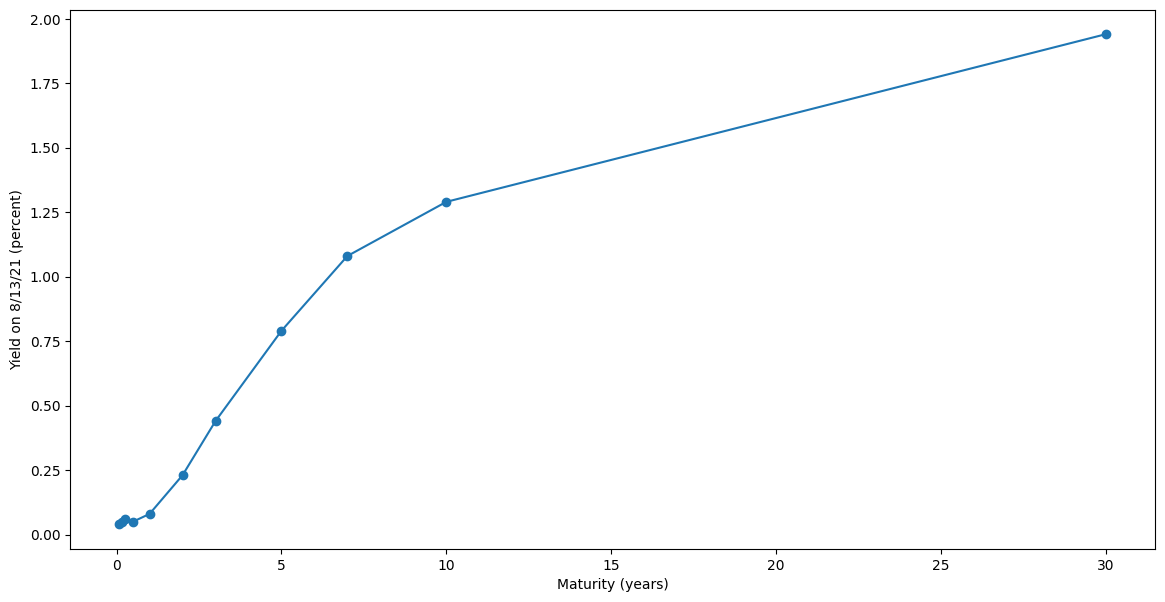

In [6]:
yield_curve_figure_20210813

### "Inverted" yield curve, July 31 2024

In [7]:
import requests
import pandas as pd
import xmltodict
from datetime import datetime

# URL for the Treasury API. The only way to filter dates is to specify a "page" number. 
# Page 28 corresponds to the most recent data as of late 2024.
url = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/pages/xml?data=daily_treasury_yield_curve&field_tdr_date_value=all&page=28'
response = requests.get(url)

if response.status_code == 200:
    data = xmltodict.parse(response.content)
    entries = data['feed']['entry']
    records = []
    for entry in entries:
        properties = entry['content']['m:properties']
        record = {
            'Date': properties['d:NEW_DATE']['#text'],
            '1Month': float(properties['d:BC_1MONTH']['#text']),
            '2Month': float(properties['d:BC_2MONTH']['#text']),
            '3Month': float(properties['d:BC_3MONTH']['#text']),
            '6Month': float(properties['d:BC_6MONTH']['#text']),
            '1Year': float(properties['d:BC_1YEAR']['#text']),
            '2Year': float(properties['d:BC_2YEAR']['#text']),
            '3Year': float(properties['d:BC_3YEAR']['#text']),
            '5Year': float(properties['d:BC_5YEAR']['#text']),
            '7Year': float(properties['d:BC_7YEAR']['#text']),
            '10Year': float(properties['d:BC_10YEAR']['#text']),
            '30Year': float(properties['d:BC_30YEAR']['#text'])
        }
        records.append(record)
    # Convert the list of records to a DataFrame
    yields = pd.DataFrame(records)
    # Convert 'Date' to datetime format
    yields['Date'] = pd.to_datetime(yields['Date'])
    # Set 'Date' as the index
    yields.set_index('Date', inplace=True)
else:
    print(f"Failed to fetch data: {response.status_code}")

In [8]:
%%capture
yields_20240731 = yields.loc['2024-07-31']
yield_curve_20240731 = pd.Series(data=list(yields_20240731),index=[1/12,2/12,3/12,6/12,1,2,3,5,7,10,30])
yield_curve_figure_20240731,ax = plt.subplots()
yield_curve_20240731.plot(marker='o')
plt.xlabel('Maturity (years)')
plt.ylim(0,6)
plt.ylabel('Yield on 7/31/24 (percent)')

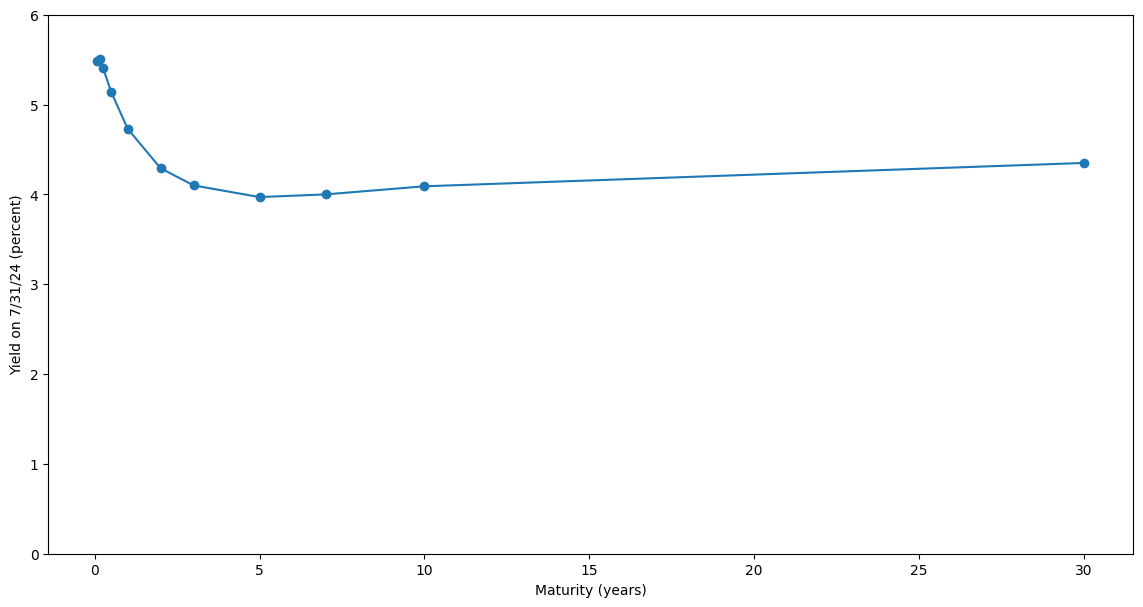

In [9]:
yield_curve_figure_20240731

### What does an inverted yield curve mean?

A common perspective (called the “expectations hypothesis”) is that, when the yield curve inverts, the market is predicting interest rates to fall between the short and long dates.

The argument is that otherwise, no one would hold the long-maturity bond. You would be better off buying the
short-maturity bond at higher yield, then rolling it over.

Because the Fed often cuts rates sharply to fight recessions, many people further conclude that an inverted yield curve predicts recessions. But rates can also fall without a recession.

As of 2024, short rates have been unusually high for a long time as part of the Fed's response to inflation.
Inflation is now falling quickly, so one could reasonably expect that the Fed will cut rates soon to return them to normal.
This would be a reasonable explanation for an inverted yield curve that does not imply a recession will happen.

### Corporate bonds: Basic facts

Like Treasuries:
- Semiannual coupon payments until repayment of principal.
- Quoted as yield to maturity, rather than price.

Unlike Treasuries:
- There is a risk of default!
    - This means the stated yield is greater than the expected return.
- Many issuers, and each may have a wide array of bonds.
    - For this reason, the bond market is fragmented and illiquid.

### The fragmented secondary market for bonds

Corporate bonds are difficult to buy and sell after issuance:
- Unlike Treasuries, they are risky, so each one must be evaluated carefully when added to a portfolio.
- Unlike corporate equities, there is a large variety of maturities, features, and terms, even for a single issuer.

Most bonds are traded “over the counter” among dealers.
- You place an order with a dealer, who must find a counterparty to take the other side, via a network that exists between them.
- This makes bond mutual funds expensive and risky to manage.

An ongoing puzzle: How to improve liquidity in this market?
- Bond exchanges have never really taken off, but may eventually.
- Bond ETFs are another potential solution, as we will discuss.

### The stock market: Basic facts

Just as bonds are a claim to interest and principal payments, stocks are a claim to dividend payments made by the issuer.

But while payments on bonds are a legal obligation, firms are not required to declare or maintain dividends.

Therefore stock is often called the “junior” or “residual” claim.

On the balance sheet, stock represents the “equity” value of the company’s assets, after all liabilities including debt are satisfied. (See further discussion below.)

### The stock market and the investor’s portfolio

The “stock market” refers to stocks listed on exchanges.

- The companies issuing these stocks must comply with strict disclosure and other requirements mandated by the SEC.
- If they comply, their stock can be sold to the general public.
- Public stocks are the largest component of most investors’ portfolios, and their biggest source of both risk and return. Therefore, this market will be the biggest focus of our class.
- Fortunately, we can also get lots of data about public stocks: Price data from exchanges, financial statements from the SEC.

Stock issued by other companies is called "private equity."
This is an important category of “alternative” investment.

### How many exchange-traded stocks are there in the US?

![](https://wgjm1986.github.io/Investments/Module%201/Week%200%20-%20Background%20information/exchange%20traded%20stocks.png)

### Brief overview of trading stocks on an exchange

NYSE and Nasdaq are the two major US stock exchanges.
For all practical purposes, trading is electronic on both.

Orders for stocks specify desired quantities at different prices.
The exchange adjusts prices to clear as many orders as possible.

The prices you see reported are the prices of recent trades:
Someone was willing to buy at that price, someone else was
willing to sell, and the exchange cleared both of their orders.

If the value of a stock changes, traders immediately change their
orders, and the very next price will be different.

The end result is like a continuous auction throughout the day.

Most importantly, there is no opportunity to trade at old prices,
and each price reflects all available information at that point.

<center><h2>Accounting for equity value</h2></center>

### Book value of equity

Book value is the value at which something is carried on the firm’s balance sheet, following standard accounting practices.

Journal entries will always maintain the key relationship,

<center>
Assets = Liabilities + Equity
</center>

Hence, the book value of equity at all times is the book value of assets, minus the book value of liabilities.

Also called “stockholders’ equity” or “shareholders’ equity.”

### Home Depot, Inc 10-K, Jan 28 2018

![](https://wgjm1986.github.io/Investments/Module%201/Week%200%20-%20Background%20information/home_depot_assets.png)

### Home Depot, Inc 10-K, Jan 28 2018

![](https://wgjm1986.github.io/Investments/Module%201/Week%200%20-%20Background%20information/home_depot_liabilities.png)

### Home Depot, Inc 10-K, Jan 28 2018

![](https://wgjm1986.github.io/Investments/Module%201/Week%200%20-%20Background%20information/home_depot_equity.png)

"Treasury stock" reflects shares repurchased in the past.

1.78 billion shares issued - 622 million repurchased = 1.158 billion outstanding.

Book value per share is \\$1.45 bn / 1.158 bn = \\$1.25.

### Market value of equity

**Market value** is the price at which something would sell now.
- Equals book value on the date when the asset or liability is created, but will generally be different at any other date.

For stocks, the difference can be tremendous:
- In Jan 2018, Home Depot’s stock sold for \\$200 per share.
- Compare with its book value per share of \\$1.25 that we just calculated!

**Market capitalization** is the total market value of a firm’s stock.
- For Home Depot, this was \\$200 × 1.158bn = \\$232bn.
- Again, compare with \\$1.45bn of book value from earlier.

### Market capitalization vs book value of equity for Home Depot

In [10]:
%%capture
import wrds
import pandas
conn = wrds.Connection(wrds_username='wmann')
data = conn.raw_sql("""
    select gvkey, popsrc, indfmt, datafmt, consol, fyear, datadate, 
    tic, seq, csho, prcc_f
    from comp.funda
    where popsrc = 'D'
    and indfmt = 'INDL'
    and datafmt = 'STD'
    and consol = 'C'
    and gvkey = '005680'
    and datadate >= '01/01/1980' and datadate <= '12/31/2024'
    """, date_cols=['datadate'])
conn.close()

data.set_index('datadate',inplace=True)
if data.index.duplicated().any(): print("Warning: non-unique dates")
data['MC'] = data['prcc_f']*data['csho']
HD_figure,ax = plt.subplots()
(data['MC']/1e3).plot(ax=ax,label="Home Depot market capitalization",color='tab:blue')
(data['seq']/1e3).plot(ax=ax,label="Home Depot book equity value",color='black')
plt.xlabel('Year')
plt.ylabel('Billions of dollars')
ax.legend(loc='upper left')

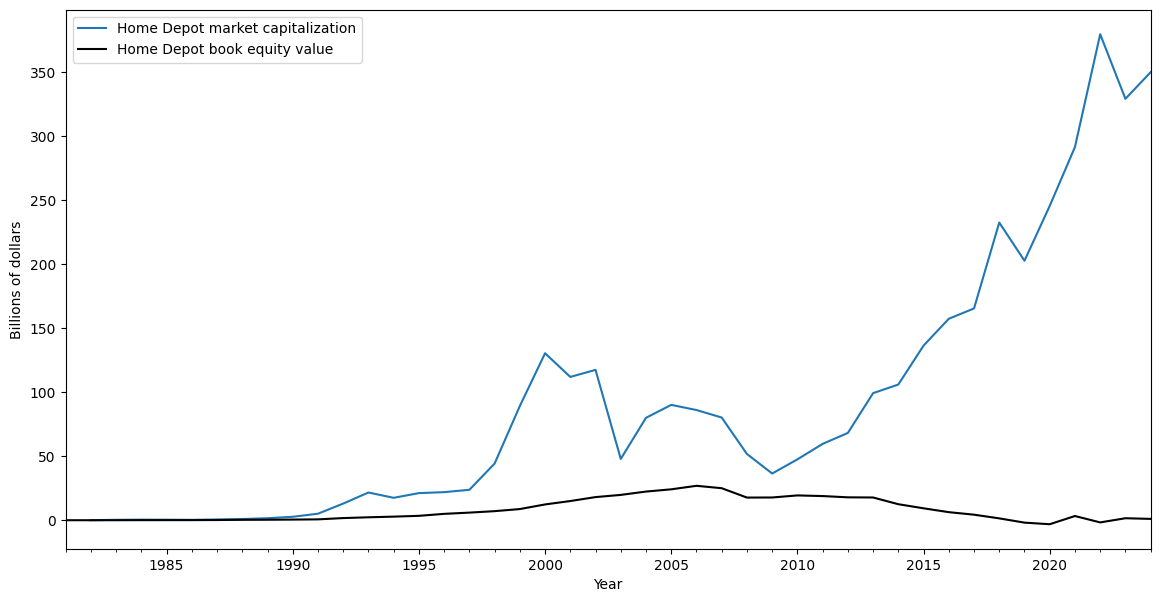

In [11]:
HD_figure

<center><h2>Valuation</h2></center>

### DCF valuation of any investment

Investments are worth the present value of expected future cash flows:

$$
P = \frac{CF_1}{1+r} + \frac{CF_2}{(1+r)^2} + \frac{CF_3}{(1+r)^3} ...
$$

- These cash flows are **expected values**: They average over every possible scenario for the future, and may grow forever.
- The DCF value is a finite number, provided the long-run average growth of cash flows is less than the required rate of return $r$.
- Discount rates should represent the “opportunity cost of capital,” which means, the average return you would get from the next-best investment that features the same level of risk.

### DCF valuation of a growing perpetuity

We can’t reliably forecast every future cash flow.  
To apply this framework, we need to simplify it.

One approach is to make a good guess about the long-run growth
rate of cash flows, call it g , and use it to forecast the future values:

$$
P = \frac{CF_1}{1+r} + \frac{CF_1\times(1+g)}{(1+r)^2} + \frac{CF_1\times(1+g)^2}{(1+r)^3} + ...
$$

Using the *growing perpetuity formula*, this magically simplifies to

$$
P = \frac{CF_1}{r - g}
$$

Most people blend these approaches: Forecast a few years, then bundle the rest into a “terminal value” using the formula above.

### Application: Risk-free bond valuation by DCF (see p.446)

A risk-free bond delivers a fixed coupon for a number of periods $T$, then a large principal repayment at the end. Its DCF valuation is

$$
P =
\text{Coupon} \times \underbrace{ \frac{1}{r_f}\left[ 1 - \frac{1}{(1+r_f)^T}\right] }_{\text{Annuity factor}} 
        \, + \,
        \text{Principal} \times \underbrace{ \frac{1}{(1+r_f)^T} }_{\text{PV factor}}
$$

The “annuity factor” is the PV of a perpetuity starting today, minus another starting from T, using the formula from above with $g = 0$.

In practice, Treasuries are regarded as the only risk-free security, and their prices are easy to look up. So this formula is mainly used to *back out* the risk-free rate, in order to use it for other purposes. You fill in the rest of the information in the formula, and then find the value of $r_f$ that makes the formula match the actual price at which the Treasury is currently trading.

### Risky bond valuation by DCF (see p.468-470)

There are two ways to adapt the prior slide to *risky* bonds:

- The first approach is to apply the DCF framework directly:  
Replace “Coupon” and “Principal” with expected values.
Replace $r_f$ with a higher rate $r_D$ that reflects the risk premium.
- The second approach is more common in practice:  
Leave “Coupon” and “Principal” equal to their promised values,
but replace $r_f$ with $y$, the yield to maturity on the bond.
- The yield to maturity on a bond is even higher than $r_D$.
It is *defined* as the rate that gives us the right answer above.  
It is not directly comparable to other investment returns
(except for risk-free bonds, in which case $y = r_f$).

Either approach is correct in principle, but they are easily confused.

### Equity valuation based on discounting future dividends

- A company’s stock is a claim to the dividends that it will pay.
- Applying the “growing perpetuity” formula from earlier,

$$
P_{\text{stock}} = \frac{\text{Div}_1}{r_E − g_{\text{Div}}}
$$

- This is called the constant-growth dividend discount model, or sometimes the Gordon growth model.
- It is not meant as a precise valuation, but a rough guide.
- $r_E$ is the discount rate for the stock’s dividends.
- $g_{Div}$ is the long-run average growth rate of those dividends.

### Equity valuation based on free cash flows to equity (FCFE)

- It’s difficult to forecast exactly when dividends will be paid.
- Different idea: Forecast the profits available to pay dividends.
    - Assume the company will pay these profits out eventually, and will manage them responsibly in the meantime, enough that we can ignore the time value involved.
- Value stocks by forecasting free cash flows to equity (FCFE).
    - FCFE are based on earnings, with adjustments (next slide).
    - The point is to focus on the firm’s profits instead of payout.
- Closely related approaches: residual-income, value-added.

### Free cash flows to equity: Textbook formulas

To calculate the free cash flow to equity in any year, we combine textbook formulas (18.9) and (18.10) to get

$$
\begin{align*}
FCFE &=
\underbrace{
EBIT \times (1-\tau_c) + \text{Dep.} - \text{Cap. ex} - \text{Increase in NWC}
}_{\text{Free cash flow to firm (FCFF)}}
\\
&-
\underbrace{
\text{Interest expense} \times (1-\tau_c) + \text{Increase in net debt}
}_{\text{Payments to/from lenders and bondholders}}
\end{align*}
$$

Intrinsic value of the firm's equity based on future FCFEs:

$$
\text{Market capitalization} \quad = \quad \frac{FCFE_{1}}{1+r_E} \quad + \quad \frac{FCFE_{2}}{(1+r_E)^2} \quad + \quad ...
$$

In a constant-growth model:
$$
\text{Market capitalization} \quad = \quad \frac{FCFE_1}{r_E - g}
$$


### Equity valuation based on free cash flow to firm (FCFF)

- Finally, we can also abstract from borrowing decisions.
- The second line in the FCFE formula is its own set of cash flows.  
Their PV should equal the value of the firm’s net debt today.
- So focus on the first line, free cash flows to the firm (FCFF).
    - Easiest to forecast because they depend only on operations.
    - Sometimes also called unlevered free cash flows, UFCF.
    - Their present value is the firm’s enterprise value, which in turn is equal to market capitalization plus net debt.
- You discount FCFF at a special rate rWACC , which is:
    - a weighted average of discount rates for debt and equity,
    - adjusted for the fact that interest payments are tax-deductible.

### Free cash flow to firm: Textbook formulas

Free cash flow to the firm in any year: Textbook formula (18.9).

$$
FCFF =
EBIT \times (1-\tau_c) \, + \, \text{Dep.} \, - \, \text{Cap. ex} \, - \, \text{Increase in NWC}
$$

$$
\text{Enterprise value} \quad = \quad \frac{FCFF_{1}}{1+r_{WACC}} \quad + \quad \frac{FCFF_{2}}{(1+r_{WACC})^2} \quad + \quad ...
$$

In a constant-growth model:
$$
\text{Enterprise value} \quad = \quad \frac{FCFF_1}{r_{WACC} - g_{FCFF}}
$$

Market capitalization = Enterprise value $-$ net debt.


<center><h2>Investment returns</h2></center>

### Payout and returns on a single stock

Payout comes in two types: Dividends, and share repurchases.

In either case, book equity and market cap fall by the total amount of the payout, as money moves out of the company.

But the following differences are important:

- Dividends do not change the number of shares outstanding,  
but instead shrink the book value and market price per share,  
by exactly the per-share amount of the dividend.
- Repurchases do not affect the value of an individual share,  
but instead shrink the total amount of shares outstanding.

Individual investors are no better or worse off for any of these differences, except for a tax issue that affects some of them (see next point).

### One tax effect worth knowing

We will mostly ignore tax issues, and focus on before-tax returns.
- Taxes are irrelevant for investors with tax-deferred accounts.
- For taxable investors, the exact effects vary greatly depending on the person.

However, one tax issue will come up later in Module 1:
- Capital gains are taxable when realized (when you sell).
- Dividends are taxable when paid, even if you did not want them.
- Thus, dividends can be inconvenient for taxable investors, if paid in a year when the investor has a high income tax bracket.
- This is a major reason behind the trend towards repurchases, and also behind the growth of ETFs.

### Measuring individual stock returns

The return on a stock between dates 1 and 2, ignoring taxes, is

$$
r = \frac{P_2 + D}{P_1} -1 
$$

where $D$ represents all dividends paid between those dates.

Suppose you purchase a stock for \\$10 in January, the stock pays a dividend of \\$1 during the following year, and you sell the stock for \\$12 in December.

$$
r = \frac{\$12 + \$1}{\$10} - 1 = 30\%
$$

### Capital gains and dividend yield

The return calculation from the previous slide has two pieces:

$$
r = 
\underbrace{
\frac{P_2}{P_1} - 1
}_{\text{Capital gain}}
+
\underbrace{
\frac{D}{P_1}
}_{\text{Dividend yield}}
$$

Capital gain is the return just from price increases.

Dividend yield is an extra percentage income from dividends.

If the company repurchases stock instead of paying a dividend, then the dividend yield is lower but the capital gain is higher.

Aside from tax effects, there is no reason for an investor to prefer one source of return over the other.

### Excess returns

The **excess return** on an investment is its return minus the risk-free
rate of return that was available during the same time.
A return that is not an excess return is called a **raw return.**

For the risk-free rate of return, we use yields on Treasury securities (see earlier slides). 

Specifically, the risk-free return between two dates is the yield *at the first date* on a zero-coupon Treasury security that matures at the second date. 

This measures the risk-free return that the investor could have earned as an alternative to any risky investment between the two dates.

In practice there may not be a Treasury security with exactly this maturity, so we have to round or average between different ones.

Note that inflation cancels out of excess returns because it affects both the risky and risk-free investment.

We will frequently focus on excess returns in this course.

<center><h2>Formulas related to investment returns</h2></center>

These formulas will be covered during the course, so don't worry if they are not familiar. They are collected here just for reference.

**Concept:** $\quad$ Arithmetic average return  
(If we just say "average", this is what we mean.)  
**Symbol:** $\quad$ $\mu$  
**Formula:** $\quad$ $\frac{r_1+r_2+\dots+r_T}{T}$  
**Use with raw or excess returns?:**  Either. Ask me if it is unclear.  
**Excel function:** AVERAGE()  
**Python function** .mean()  

**Concept:** $\quad$ Volatility (standard deviation)  
**Symbol:** $\quad$ $\sigma$  
**Formula:** $\quad$ $\sqrt{\frac{1}{T-1}\sum_t (r_t-\mu)^2}$  
(This formula appears only for completeness. I will not ask you to use it.)  
**Use with raw or excess returns?:**  Either  
**Excel function:** STDEV()  
**Python function** .std()

**Concept:** $\quad$ Sharpe ratio  
**Symbol:** $\quad$ SR  
**Formula:** $\quad$ $\mu / \sigma$  
**Use with raw or excess returns?:**  Excess only  

**Concept:** $\quad$ Cumulative return  
**Formula:** $\quad$ $(1+r_1)\times(1+r_2)\times\dots\times(1+r_T)$  
**Use with raw or excess returns?:**  Raw only  
**Excel function**: Create a column gross returns (one plus net return), then multiply them together with PRODUCT()    
**Python function**: .cumprod()

**Concept:** $\quad$ Geometric average  
**Symbol:** $\quad$ GM  
**Formula:** $\quad$ $\text{Cumulative return}^{1/T}$  
**Use with raw or excess returns?:** Raw only  

**Concept:** $\quad$ Correlation (between A and B)  
**Symbol:** $\quad$ $\rho_{AB}$  
**Formula:** $\quad$ $\frac{\sum (r_A-\mu_A)\times(r_B-\mu_B)}{\sqrt{\sum (r_A-\mu_A)^2 \sum (r_B-\mu_B)^2 }}$  
(This formula appears only for completeness. I will not ask you to know it.)  
**Use with raw or excess returns?:** Either  
**Excel function:** CORREL()  
**Python function:** np.corrcoef()  
(requires you to first say "import numpy as np")

**Concept:** $\quad$ Beta (of A with respect to B)  
**Symbol:** $\quad$ $\beta_{AB}$  
**Formula:** $\quad$ $\rho_{AB} \times \frac{\sigma_A}{\sigma_B}$  
**Use with raw or excess returns?:** Excess  
**Excel function:** SLOPE()  
**Python function:** See examples in class notes using the statsmodels library.

**Concept:** $\quad$ Alpha (of A with respect to B)  
**Symbol:** $\quad$ $\alpha_{AB}$  
**Formula:** $\quad$ $\mu_A - \beta_{AB} \times \mu_B$  
**Use with raw or excess returns?:** Excess  
**Excel function:** INTERCEPT()  
**Python function:** See examples in class notes using the statsmodels library.

Other notes:

In many of our examples, B is the portfolio that the investor already holds (often the market portfolio), and A is a specific investment that they are thinking about adding.

In Module 2 we will use the following approximation to the geometric average return:
$$
GM \approx \mu - \frac{1}{2}\sigma^2
$$
This is fairly accurate in general and would be exactly true if returns were normally distributed.